If you opt not to implement resizing, discuss its possible limitations in your report.


In [ ]:
import time
import random
import matplotlib.pyplot as plt
import csv
import heapq

# Part 1 : Implementing Hash Table

In [ ]:
class HashMap:

    def __init__(self, size=10, hash_method="division"):
        self.size = size
        self.count = 0
        self.table = [[] for _ in range(size)]  # Initialize empty lists for chaining
        self.hash_method = hash_method
        
        # For multiplication method
        self.A = 0.6180339887  # Golden ratio constant

    def hash_function(self, key):
        # Convert key to a hashable integer if it's not already
        if not isinstance(key, int):
            # Simple string to int conversion for demonstration
            if isinstance(key, str):
                key_sum = sum(ord(c) for c in key)
            else:
                key_sum = hash(key)
        else:
            key_sum = key
            
        if self.hash_method == "division":
            return key_sum % self.size
        elif self.hash_method == "multiplication":
            # Multiplication method: h(k) = floor(m * (k * A mod 1))
            return int(self.size * ((key_sum * self.A) % 1))

    def insert(self, key, value):
        index = self.hash_function(key)
        
        # Check if key already exists
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)  # Update value
                return
        
        # Key doesn't exist, add new key-value pair
        self.table[index].append((key, value))
        self.count += 1

    def search(self, key):
        index = self.hash_function(key)
    
        # Search in the chain at the index
        for k, v in self.table[index]:
            if k == key:
                return v
        return None  # Key not found

    def delete(self, key):
        index = self.hash_function(key)
        
        # Find and remove key in the chain
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index].pop(i)
                self.count -= 1
                return True
        return False  # Key not found
    
    def get_memory_stats(self):
        chain_lengths = [len(bucket) for bucket in self.table]
        return {
            "avg_chain_length": sum(chain_lengths) / self.size,
            "max_chain_length": max(chain_lengths) if chain_lengths else 0
        }

In [12]:
# Create a hash table
ht = HashMap(size=100, hash_method="division")

In [13]:
# Insert some key-value pairs
for i in range(70):  # 70% load factor
    ht.insert(i, f"value-{i}")

In [14]:
# Searching a key
print(ht.search(50))

value-50


In [15]:
# Delete a key
ht.delete(50)

True

In [16]:
# searching a key
print(ht.search(50))

None


## Load factor vs. lookup time (fix 2-3 table sizes)

- Plot load factor vs. average search time across different table sizes
- Use both successful and unsuccessful searches to evaluate worst-case performance
- Measure average search time for a randomly selected key

In [26]:
def measure_search_time(hash_table, keys, num_samples=100):
    """Measure average search time for random keys"""
    total_time = 0
    sample_keys = random.sample(keys, min(num_samples, len(keys)))
    
    for key in sample_keys:
        start_time = time.time()
        hash_table.search(key)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    return total_time / len(sample_keys)

In [27]:
results = {}
key_count=1000
max_load=0.9

for size in [500, 1000, 2000]:
    load_factors = []
    search_times = []
    
    hash_table = HashMap(size=size)
    keys = list(range(key_count))
    
    # Insert keys incrementally and measure at different load factors
    for i in range(0, key_count, key_count//10):
        if i == 0:
            continue
            
        # Insert keys
        for j in range(i):
            hash_table.insert(keys[j], f"value-{j}")
        
        current_load = i / size
        if current_load > max_load:
            break
            
        load_factors.append(current_load)
        search_times.append(measure_search_time(hash_table, keys[:i]))
    
    results[size] = (load_factors, search_times)

In [28]:
results

{500: ([0.2, 0.4, 0.6, 0.8],
  [2.9087066650390624e-07,
   2.6702880859375e-07,
   2.6226043701171877e-07,
   2.6702880859375e-07]),
 1000: ([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
  [2.694129943847656e-07,
   2.551078796386719e-07,
   2.7179718017578123e-07,
   2.694129943847656e-07,
   2.7418136596679685e-07,
   2.7179718017578123e-07,
   2.9087066650390624e-07,
   4.482269287109375e-07,
   2.9087066650390624e-07]),
 2000: ([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45],
  [4.839897155761718e-07,
   4.911422729492188e-07,
   5.006790161132813e-07,
   5.054473876953125e-07,
   5.459785461425781e-07,
   5.125999450683594e-07,
   3.1709671020507814e-07,
   2.980232238769531e-07,
   3.0040740966796875e-07])}

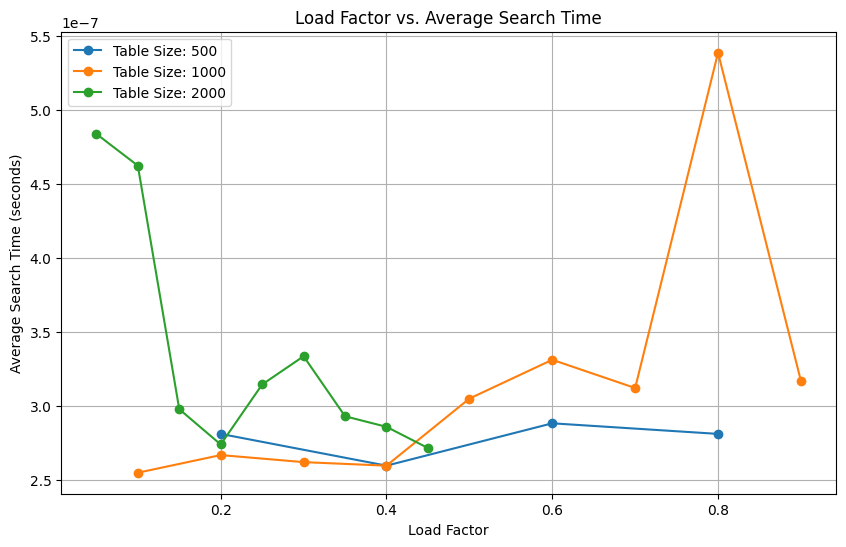

In [25]:
# plotting
plt.figure(figsize=(10, 6))
for size, (load_factors, search_times) in results.items():
    plt.plot(load_factors, search_times, marker='o', label=f"Table Size: {size}")
plt.xlabel("Load Factor")
plt.ylabel("Average Search Time (seconds)")
plt.title("Load Factor vs. Average Search Time")
plt.legend()
plt.grid(True)
plt.show()

## Compare search time across different distributions

In [29]:
def analyze_key_distributions(table_size, load_factor):
    """Compare search time across different key distributions"""
    distributions = {
        "uniform": [random.randint(0, 10000) for _ in range(int(table_size * load_factor))],
        "skewed": [random.randint(0, 100) for _ in range(int(table_size * load_factor))],
        "sequential": list(range(int(table_size * load_factor)))
    }
    
    results = {}
    
    for dist_name, keys in distributions.items():
        hash_table = HashMap(size=table_size)
        
        # Insert keys
        for i, key in enumerate(keys):
            hash_table.insert(key, f"value-{i}")
        
        # Measure search time
        results[dist_name] = measure_search_time(hash_table, keys)
    
    return results

In [30]:
distribution_results = analyze_key_distributions(100, 0.7)

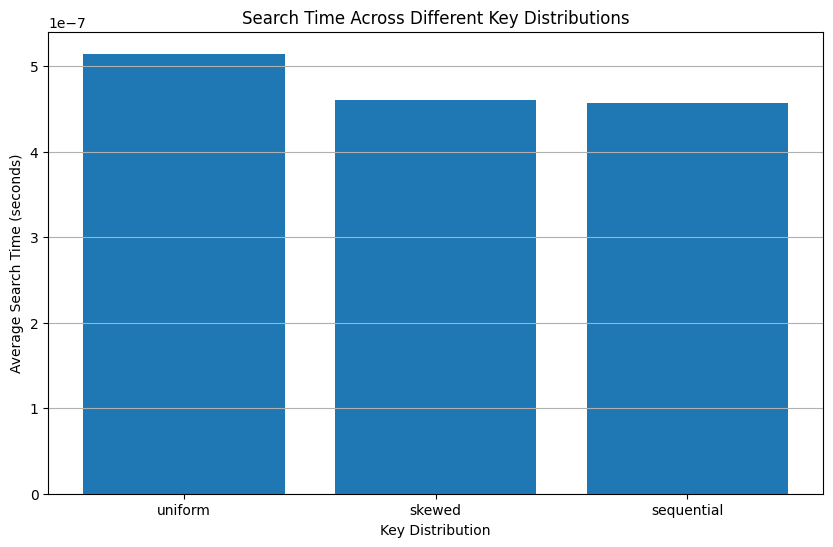

In [31]:
distributions = list(distribution_results.keys())
times = list(distribution_results.values())

plt.figure(figsize=(10, 6))
plt.bar(distributions, times)
plt.xlabel("Key Distribution")
plt.ylabel("Average Search Time (seconds)")
plt.title("Search Time Across Different Key Distributions")
plt.grid(True, axis='y')
plt.show()

## Memory overhead analysis

In [43]:
print(ht.get_memory_stats())

{'avg_chain_length': 0.69, 'max_chain_length': 1}


# Part 2 : Algorithm Implementation

In [32]:
class Homework5:

    def findMostFrequentElementUsingHashMap(self, nums:list) -> int:
        # Handle empty input list case
        if not nums:
            return -1
                
        # Initialize our custom hash table
        ht = HashMap(size=len(nums), hash_method="division")
        
        # Count frequency of each element
        for num in nums:
            # Check if the element already exists in the hash table
            count = ht.search(num)
            if count is None:
                ht.insert(num, 1)  # First occurrence
            else:
                ht.insert(num, count + 1)  # Increment count
        
        max_freq = 0
        max_element = None
        
        # Find element with maximum frequency
        for bucket in ht.table:
            for key, freq in bucket:
                # Update if current frequency is higher or
                # if frequencies are equal but current element is larger
                if freq > max_freq or (freq == max_freq and key > max_element):
                    max_freq = freq
                    max_element = key
        
        return max_element

    def findMostFrequentElementUsingHeap(self,nums:list) -> int:
        # Handle empty input list case
        if not nums:
            return -1
        
        freq_dict = {}
        for num in nums:
            freq_dict[num] = freq_dict.get(num, 0) + 1
        
        # Create a max heap (Python's heapq is a min heap, so we negate values)
        # Format: (-frequency, -element) to get max frequency and max element for ties
        heap = [(-freq, -num) for num, freq in freq_dict.items()]
        heapq.heapify(heap)
        
        # The root of the heap will have the most frequent element
        # (or the largest one in case of a tie)
        most_frequent = -heap[0][1]
        return most_frequent

    def twoSumBruteForce(self, nums: list, target: int) -> list:
        # Iterate through all pairs of indices
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                if nums[i] + nums[j] == target:
                    return [i, j]
        return None

    def twoSumHashTable(self, nums: list, target: int) -> list:
        ht = HashMap(size=len(nums))
        for i, num in enumerate(nums):
            complement = target - num
            complement_index = ht.search(complement)
            if complement_index is not None:
                return [complement_index, i]
            ht.insert(num, i)
        return None

In [33]:
if __name__=="__main__":
    homework5  = Homework5()
    
    
    
    
    
    
    testCasesforQuestion2 = []
    try:
        with open('testcases1.csv','r') as file:
            testCases = csv.reader(file)
            for row in testCases:
                testCasesforQuestion2.append(row)
    except FileNotFoundError:
        print("File Not Found")
    
    #Running Test Cases for Question 1
    print("RUNNING TEST CASES FOR MOST FREQUENT ELEMENT: ")
    
    for row , (inputValue,expectedOutput) in enumerate(testCasesforQuestion2,start=1):
        if(inputValue=="" and expectedOutput=="-1"):
            inputValue=[]
            expectedOutput=-1
        else:
            inputValue=inputValue.split(" ")
            inputValue = [int(i) for i in inputValue]
            expectedOutput=int(expectedOutput)
        actualOutputForHashMap = homework5.findMostFrequentElementUsingHashMap(inputValue)
        actualOutputForHeap = homework5.findMostFrequentElementUsingHeap(inputValue)
        if(actualOutputForHashMap == expectedOutput and actualOutputForHeap == expectedOutput):
            print(f"Test Case {row} : PASSED")
        else:
             print(f"Test Case {row}: Failed (Expected : {expectedOutput}, Actual For Hash Map: {actualOutputForHashMap}, Actual for Heap: {actualOutputForHeap})")
    print("\n")
    
    
    
    
    
    
    
    
    
    




    testCasesForQuestion2 = []
    try:
        with open('testcases2.csv', 'r') as file:
            testCases = csv.reader(file)
            for row in testCases:
                testCasesForQuestion2.append(row)
    except FileNotFoundError:
        print("File Not Found")
    
    print("RUNNING TEST CASES FOR TWO SUM PROBLEM:")

    for row, (inputStr, targetStr, expectedStr) in enumerate(testCasesForQuestion2, start=1):
        # If the input string is empty, use an empty list.
        if inputStr == "":
            nums = []
        else:
            nums = list(map(int, inputStr.split(" ")))
        target = int(targetStr)
        expected = list(map(int, expectedStr.split(" ")))

        result_brute = homework5.twoSumBruteForce(nums, target)
        result_hash = homework5.twoSumHashTable(nums, target)

        if result_brute == expected and result_hash == expected:
            print(f"Test Case {row}: PASSED")
        else:
            print(f"Test Case {row}: FAILED")
            print(f"  Input: {nums}")
            print(f"  Target: {target}")
            print(f"  Expected: {expected}")
            print(f"  Brute Force Output: {result_brute}")
            print(f"  Hash Table Output: {result_hash}")

RUNNING TEST CASES FOR MOST FREQUENT ELEMENT: 
Test Case 1 : PASSED
Test Case 2 : PASSED
Test Case 3 : PASSED
Test Case 4 : PASSED
Test Case 5 : PASSED
Test Case 6 : PASSED
Test Case 7 : PASSED
Test Case 8 : PASSED
Test Case 9 : PASSED
Test Case 10 : PASSED
Test Case 11 : PASSED
Test Case 12 : PASSED
Test Case 13 : PASSED
Test Case 14 : PASSED
Test Case 15 : PASSED
Test Case 16 : PASSED
Test Case 17 : PASSED
Test Case 18 : PASSED
Test Case 19 : PASSED
Test Case 20 : PASSED
Test Case 21 : PASSED
Test Case 22 : PASSED
Test Case 23 : PASSED
Test Case 24 : PASSED
Test Case 25 : PASSED
Test Case 26 : PASSED


RUNNING TEST CASES FOR TWO SUM PROBLEM:
Test Case 1: PASSED
Test Case 2: PASSED
Test Case 3: PASSED
Test Case 4: PASSED
Test Case 5: PASSED
Test Case 6: PASSED
Test Case 7: PASSED
Test Case 8: PASSED
Test Case 9: PASSED
Test Case 10: PASSED
Test Case 11: PASSED
Test Case 12: PASSED
Test Case 13: PASSED
Test Case 14: PASSED
Test Case 15: PASSED
Test Case 16: PASSED
Test Case 17: PASSED
